# Sentiment Analysis on a Reddit post of Cryptocurrency 

In this notebook, I am going to analysis a reddit post by using the Python Reddit API Wrapper(PRAW)

In [54]:
import praw

In [55]:
import config_reddit

In [56]:
import spacy

In [57]:
import config_reddit 

In [58]:
import pandas as pd

In [59]:
# establish an API connection
reddit = praw.Reddit(user_agent=f"Exploration script by /u/{config_reddit.user_name}",
                     client_id=config_reddit.app_id,
                     client_secret=config_reddit.app_secret)

In [60]:
url = "https://www.reddit.com/r/CryptoCurrency/comments/wbjii0/daily_general_discussion_july_30_2022_gmt0/"

In [61]:
submission = reddit.submission(url=url)

In [62]:
post_comments = []

In [63]:
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    post_comments.append(comment.body)

In [64]:
post_comments

['One day Bitcoin is gonna allow me to give up working these weekend shifts 😔',
 "Volatility is the price you pay for the world's best performing asset.",
 'Just got back from a few days camping. Looks like things popped off while I was gone. Should go camping and skip charts more often.',
 'I miss the days when everyday was green and my job became staring at green charts on an hourly basis.',
 'the good news is that the prices are still very good to DCA\n\nthe bad news is I am broke',
 'How can anyone say volatility is bad if they expect the assets to appreciate in value? \n\n\nAfter showing use, more people can see it in action, then want it. But all in waves.        \nIf you *want* a $69k btc then it has to go up, if you want btc at 420k then there has to be periods of extreme volatility.',
 'The Polkadot didn’t look so bad today!',
 '🌹 ROSE. look it is about time for another 10% spike. Look for it real soon. Consolidation is in and ready 🌹',
 'Bought 100 dollars eth, prepare for a 

# Sentiment Analysis with TextBlob

In [65]:
df = pd.DataFrame(post_comments)

In [66]:
from textblob import TextBlob

In [67]:
import numpy as np

In [68]:
df['Sentiment'] = np.nan

In [69]:
df.columns = ['Comment','Sentiment']

In [70]:
df

,Comment,Sentiment
0,One day Bitcoin is gonna allow me to give up w...,NaN
1,Volatility is the price you pay for the world'...,NaN
2,Just got back from a few days camping. Looks l...,NaN
3,I miss the days when everyday was green and my...,NaN
4,the good news is that the prices are still ver...,NaN
...,...,...
262,"I don't have to, but I need an excuse to get d...",NaN
263,Bro it was a joke,NaN
264,Thankyou 🧁,NaN
265,"True, there is always someone who is not doing...",NaN


Now I am going to assign the Sentiment value to each comment, using the following for loop.

In [71]:
for index, row in df.iterrows():
    comment_polarity = TextBlob(row['Comment']).sentiment.polarity
    df.at[index,'Sentiment'] = comment_polarity

In [72]:
df

,Comment,Sentiment
0,One day Bitcoin is gonna allow me to give up w...,0.000000
1,Volatility is the price you pay for the world'...,1.000000
2,Just got back from a few days camping. Looks l...,0.100000
3,I miss the days when everyday was green and my...,-0.200000
4,the good news is that the prices are still ver...,0.303333
...,...,...
262,"I don't have to, but I need an excuse to get d...",-0.275000
263,Bro it was a joke,0.000000
264,Thankyou 🧁,0.000000
265,"True, there is always someone who is not doing...",0.350000



We got the Sentiment values for each comment. However, it does not look good.  there is another problem.

TextBlob will not recognise everyword, and when it comes to social media comments like this where spelling errors are very much possible. Here, the unrecognised words are given the sentiment value of 0.

Thus, in order to prevent this, I am  going to ignore any comments with the sentiment value of 0 to extract the best results. 

In [73]:
unwanted_index = []

In [74]:
for index,row in df.iterrows():
    if row['Sentiment'] == 0.0:
        unwanted_index.append(index)

Now the indices of the comments with 0 sentiment value are stored in the list unwanted_index.

In [75]:
len(unwanted_index)

97

This shows that 57 comments have 0 sentiment value, so I am going to remove them. Nonetheless, the remaining comments are enough for the analysis, the large number of rejected comments show the imperfection of this method. 

In [76]:
final_data = df.drop(unwanted_index)

In [77]:
final_data

,Comment,Sentiment
1,Volatility is the price you pay for the world'...,1.000000
2,Just got back from a few days camping. Looks l...,0.100000
3,I miss the days when everyday was green and my...,-0.200000
4,the good news is that the prices are still ver...,0.303333
5,How can anyone say volatility is bad if they e...,-0.056250
...,...,...
260,I'll take the green dildos but I still don't b...,-0.125000
261,"Damn, no wonder your bitcoin stack is half wha...",-0.406901
262,"I don't have to, but I need an excuse to get d...",-0.275000
265,"True, there is always someone who is not doing...",0.350000


In [78]:
final_data.describe()

,Sentiment
count,170.000000
mean,0.163883
std,0.361617
min,-0.910000
25%,-0.100000
50%,0.167619
75%,0.481250
max,1.000000


# Positive And Negative Comments 

Now, I am going to find the  number of positive and negative comments.

In [80]:
positive_count = 0
negative_count = 0

In [81]:
for index, row in final_data.iterrows():
    if row['Sentiment'] > 0:
        positive_count += 1
    elif row['Sentiment'] < 0:
        negative_count += 1

In [82]:
positive_count, negative_count

(111, 59)

Here I can infer that TextBlob gave me 111 comments which are positive, and there are 59 comments which are negative.  

Now let's analyze the sentiment value distribution in a graphical fashion, using the seaborn library.

In [83]:
import seaborn as sns

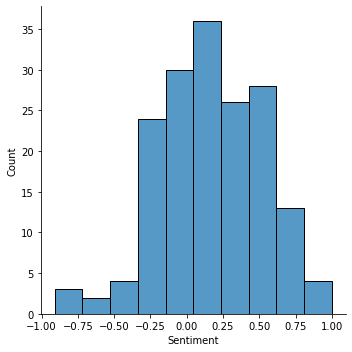

In [84]:
sns.displot(x=final_data['Sentiment'])

Most of the comments have a sentiment value between -0.25 to 0.50. The other insight is that the majority of comments are slightly to moderately positive.

lastly, let's do some analysis on word frequency. For that I will use the Spacy library, which is primary and free used for Natural Language Processing (NLP). IO already loaded the Spacy  library at the top of the notebook.

In [85]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [86]:
complete_doc = nlp(str(post_comments))

In [87]:
words = [token.text for token in complete_doc if not token.is_stop and not token.is_punct and token.pos_ == 'PROPN']

In [88]:
from collections import Counter

In [89]:
word_freq = Counter(words)

In [90]:
common_words = word_freq.most_common(10)

In [91]:
common_words

[('BTC', 13),
 ('DCA', 6),
 ('crypto', 6),
 ('ETH', 5),
 ('Lmao', 4),
 ('Bitcoin', 3),
 ('btc', 3),
 ('🌹', 2),
 ('ROSE', 2),
 ('ICP', 2)]

In [92]:
positive_words = [token.text for token in complete_doc if not token.is_stop and not token.is_punct and TextBlob(str(token)).sentiment.polarity > 0]

In [93]:
positive_freq = Counter(positive_words)

In [94]:
common_positive_words = positive_freq.most_common(10)

In [95]:
common_positive_words

[('good', 10),
 ('better', 8),
 ('sure', 7),
 ('best', 6),
 ('lol', 6),
 ('pretty', 5),
 ('nice', 4),
 ('right', 4),
 ('Lmao', 4),
 ('real', 3)]

In [96]:
type(common_positive_words)

list

In [97]:
a,b = zip(*common_positive_words)

In [98]:
a = np.array(a)
b = np.array(b)

/Users/memonzzmahnoor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 frequently used positive words')

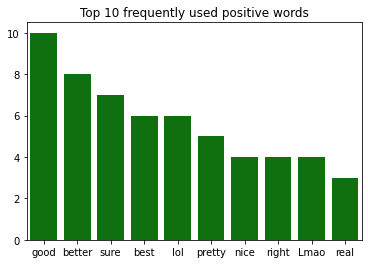

In [99]:
sns.barplot(a,b,color = 'green').set_title('Top 10 frequently used positive words')